In [1]:
import numpy as np

from squlearn.qnn.lowlevel_qnn_pennylane import LowLevelQNNPennyLane
from squlearn.qnn.lowlevel_qnn_qiskit import LowLevelQNN

from squlearn.encoding_circuit import HubregtsenEncodingCircuit
from squlearn.observables import SummedPaulis

from squlearn import Executor

import pennylane as qml

In [2]:
obs = SummedPaulis(4)
print(obs)

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2]), ParameterExpression(1.0*p[3]),
 ParameterExpression(1.0*p[4])])


c:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


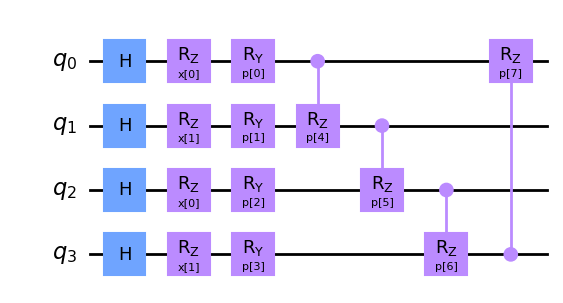

In [3]:
pqc = HubregtsenEncodingCircuit(4,2)
pqc.draw()

In [4]:
np.random.seed(0)
x_val = np.array([[0.5,0.6],[0.7,0.8]])
p_val = np.random.random(pqc.num_parameters)
op_val = np.random.random(obs.num_parameters)

In [5]:
qnn = LowLevelQNNPennyLane(pqc,obs,None)
qnn(x_val,p_val,op_val)

self._pennylane_gates [<class 'pennylane.ops.qubit.non_parametric_ops.Hadamard'>, <class 'pennylane.ops.qubit.non_parametric_ops.Hadamard'>, <class 'pennylane.ops.qubit.non_parametric_ops.Hadamard'>, <class 'pennylane.ops.qubit.non_parametric_ops.Hadamard'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RZ'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RZ'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RZ'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RZ'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_controlled.CRZ'>, <class 'pennylane.ops.qubit.parametric_ops_controlled.CRZ'>, <class 'pennylane.ops.qubit.parametric_ops_controlled.CRZ'>, <class 'pennylane.ops.qubit.parametric_ops_controlled.CRZ'>]
s

array([-0.14651873])

In [6]:
#qml.draw_mpl(qnn._pennylane_circuit._pennylane_circuit)(x_val,p_val,op_val)

In [7]:
qnn_qiskit = LowLevelQNN(pqc,obs,Executor())
qnn_qiskit(x_val,p_val,op_val)

-0.1465187334757355

In [10]:
qnn_qiskit.evaluate(("f","dfdp","dfdx"),x_val,p_val,op_val)

{Expec(I,O,f): -0.1465187334757355,
 'f': -0.1465187334757355,
 'x': array([0.5, 0.6]),
 'param': array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
        0.64589411, 0.43758721, 0.891773  ]),
 'param_op': array([0.96366276, 0.38344152, 0.79172504, 0.52889492, 0.56804456]),
 Expec(I,dop,dfdop): array([ 1.        , -0.45781319, -0.54122241, -0.49752001, -0.42778647]),
 'dfdop': array([ 1.        , -0.45781319, -0.54122241, -0.49752001, -0.42778647]),
 Expec(dp,O,dfdp): array([-2.87084343e-01, -4.93326141e-01, -3.82352984e-01, -4.00935500e-01,
         0.00000000e+00, -6.24500451e-17,  0.00000000e+00, -1.04083409e-16]),
 Expec(dx,O,dfdx): array([0.23965219, 0.45939862]),
 'dfdp': array([-2.87084343e-01, -4.93326141e-01, -3.82352984e-01, -4.00935500e-01,
         0.00000000e+00, -6.24500451e-17,  0.00000000e+00, -1.04083409e-16]),
 'dfdx': array([0.23965219, 0.45939862])}

In [11]:
qnn.evaluate(("f","dfdp","dfdx"),x_val,p_val,op_val)

{'x': array([0.5, 0.6]),
 'param': array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
        0.64589411, 0.43758721, 0.891773  ]),
 'param_op': array([0.96366276, 0.38344152, 0.79172504, 0.52889492, 0.56804456]),
 'f': array([-0.14651873]),
 'dfdp': array([[-2.87084343e-01, -4.93326141e-01, -3.82352984e-01,
         -4.00935500e-01,  1.75086156e-17,  2.85800014e-17,
         -1.31610651e-17, -3.81242618e-17]]),
 'dfdx': array([[[0.23965219],
         [0.45939862]]])}